Exp 5
Implementing of CNN for classification of fashion items using Fashion MNIST dataset.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# From library import and load datasets, layers and models.
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Reshape the images to add a channel dimension
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
print(x_train.shape, y_train.shape)

(60000, 28, 28, 1) (60000,)


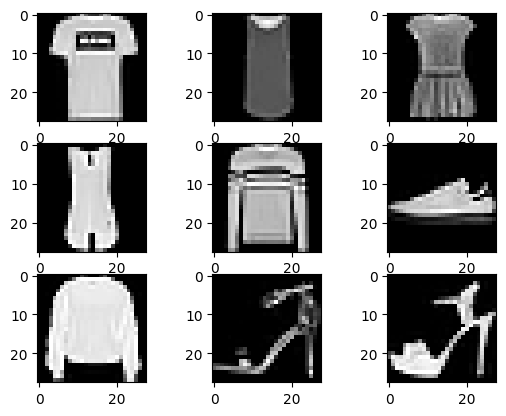

In [4]:
# Sample images of the fashion MNIST dataset
for i in range(1, 10):
    # Create a 3x3 grid and place the image in ith position of grid
    plt.subplot(3, 3, i)
    # Insert ith image with the color map 'grap'
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# Display the entire plot
plt.show()


In [5]:
# Checking how many images are there in every class?
import numpy as np
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [6]:
# Normalize pixel values to range between 0 and 1.
x_train=x_train/255
x_test = x_test/255


In [7]:
# Define the CNN architecture
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Flatten

In [8]:
cnn = keras.Sequential()
cnn.add(Conv2D(64,(3,3), input_shape=(28,28,1)))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(64,(3,3), padding="same",strides=(2,2), activation='relu', kernel_initializer="glorot_uniform", input_shape=(28,28,1)))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(10,activation='softmax'))

In [11]:
# Compile model
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


# Summary of the model
cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 128)               7

In [12]:
# Train the model
history = cnn.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 69s 36ms/step - loss: 0.5284 - accuracy: 0.8084 - val_loss: 0.3863 - val_accuracy: 0.8567
Epoch 2/20
1875/1875 [==============================] - 63s 33ms/step - loss: 0.3594 - accuracy: 0.8672 - val_loss: 0.3340 - val_accuracy: 0.8791
Epoch 3/20
1875/1875 [==============================] - 81s 43ms/step - loss: 0.3167 - accuracy: 0.8834 - val_loss: 0.3135 - val_accuracy: 0.8858
Epoch 4/20
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2915 - accuracy: 0.8916 - val_loss: 0.3083 - val_accuracy: 0.8874
Epoch 5/20
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2699 - accuracy: 0.8985 - val_loss: 0.2951 - val_accuracy: 0.8945
Epoch 6/20
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2542 - accuracy: 0.9054 - val_loss: 0.2964 - val_accuracy: 0.8890
Epoch 7/20
1875/1875 [==============================] - 63s 34ms/step - loss: 0.2376 - accuracy: 0.9114 - val_loss: 0.2743 -

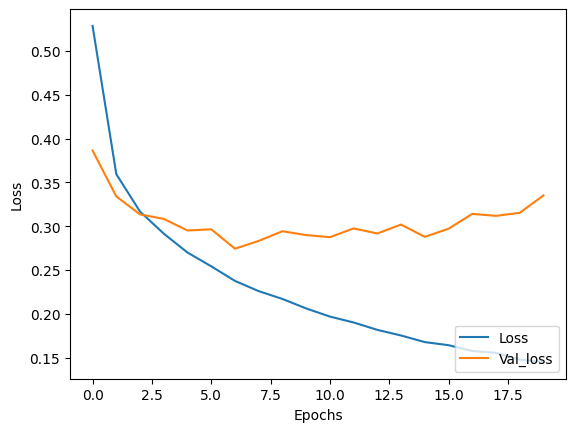

In [20]:
#Plotting the loss, val_loss
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Val_loss"], loc ="lower right")
plt.show()


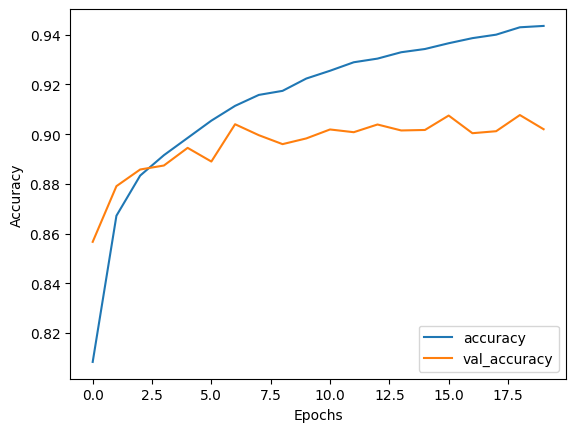

In [21]:
#Plotting the accuracy, val_acc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["accuracy", "val_accuracy"], loc ="lower right")
plt.show()

In [22]:
#Predicting the x_test value
y_pred = cnn.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred


313/313 [==============================] - 3s 10ms/step


array([9, 2, 1, ..., 8, 1, 5])

In [23]:
#Displaying confusion matrix
confusion_matrix(y_pred,y_test)

array([[841,   2,  17,  20,   0,   0,  95,   0,   5,   1],
       [  0, 969,   0,   2,   0,   0,   0,   0,   0,   0],
       [ 15,   1, 833,  12,  46,   0,  64,   0,   4,   0],
       [ 13,  19,  11, 907,  23,   0,  23,   0,   2,   0],
       [  5,   4,  63,  33, 890,   0,  92,   0,   4,   0],
       [  1,   0,   0,   0,   0, 980,   0,  16,   3,   5],
       [121,   5,  75,  24,  40,   0, 716,   0,   6,   0],
       [  0,   0,   0,   0,   0,  10,   0, 938,   2,  21],
       [  4,   0,   1,   2,   1,   0,  10,   0, 973,   0],
       [  0,   0,   0,   0,   0,  10,   0,  46,   1, 973]])

In [24]:
#Displaying classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       981
           1       0.97      1.00      0.98       971
           2       0.83      0.85      0.84       975
           3       0.91      0.91      0.91       998
           4       0.89      0.82      0.85      1091
           5       0.98      0.98      0.98      1005
           6       0.72      0.73      0.72       987
           7       0.94      0.97      0.95       971
           8       0.97      0.98      0.98       991
           9       0.97      0.94      0.96      1030

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [25]:
#Printing the model accuracy
accuracy_score(y_test,y_pred)



0.902